In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the base directory and txpid values
base_dir = "/home/scuk/RS/thinker/data/detect"
dxpids = {
    "thinker": ("v18_thinker-0", "a_", ""),
    "mcts": ("v18_mcts-0", "a_", ""),    
    "drc (hidden)": ("v18_drc_2-0", "e_", "_hs"),
    "drc (model)": ("v18_drc_2-0", "e_", ""),
    "drc (none)": ("v18_drc_2-0", "e_", "_none"),
    "drc-4m (hidden)": ("v18_drc_4mds-0", "a_", "_hs"),
    "drc-4m (model)": ("v18_drc_4mds-0", "a_", ""),
    "drc-4m (none)": ("v18_drc_4mds-0", "a_", "_none"),
    "mlp (hidden)": ("v18_mlp-1", "c_", "_hs"),
    "mlp (model)": ("v18_mlp-1", "c_", ""),
    "mlp (none)": ("v18_mlp-1", "c_", "_none"),
        }

txpids = ["1k", "2k", "5k", "10k", "20k", "50k", "100k"]
data_sizes = [1000, 2000, 5000, 10000, 20000, 50000, 100000]

# Initialize data structures to hold the accuracy and F1 scores
acc_data = {dxpid: [] for dxpid in dxpids}
f1_data = {dxpid: [] for dxpid in dxpids}

# Load the data
for dxpid, file_names in dxpids.items():
    for txpid, data_size in zip(txpids, data_sizes):
        stats_path = os.path.join(base_dir, file_names[0], "net", file_names[1]+txpid+file_names[2], "stats.npy")
        # Check if the file exists to avoid errors
        if os.path.exists(stats_path):
            stats = np.load(stats_path, allow_pickle=True)
            last_record = stats[-1]  # Get the last item in the list
            # Extract "test\acc" and "test\f1" and append to the respective lists
            acc_data[dxpid].append(last_record["test/acc"])
            f1_data[dxpid].append(last_record["test/f1"])
        else:
            print(f"File not found: {stats_path}")
            acc_data[dxpid].append(None)
            f1_data[dxpid].append(None)

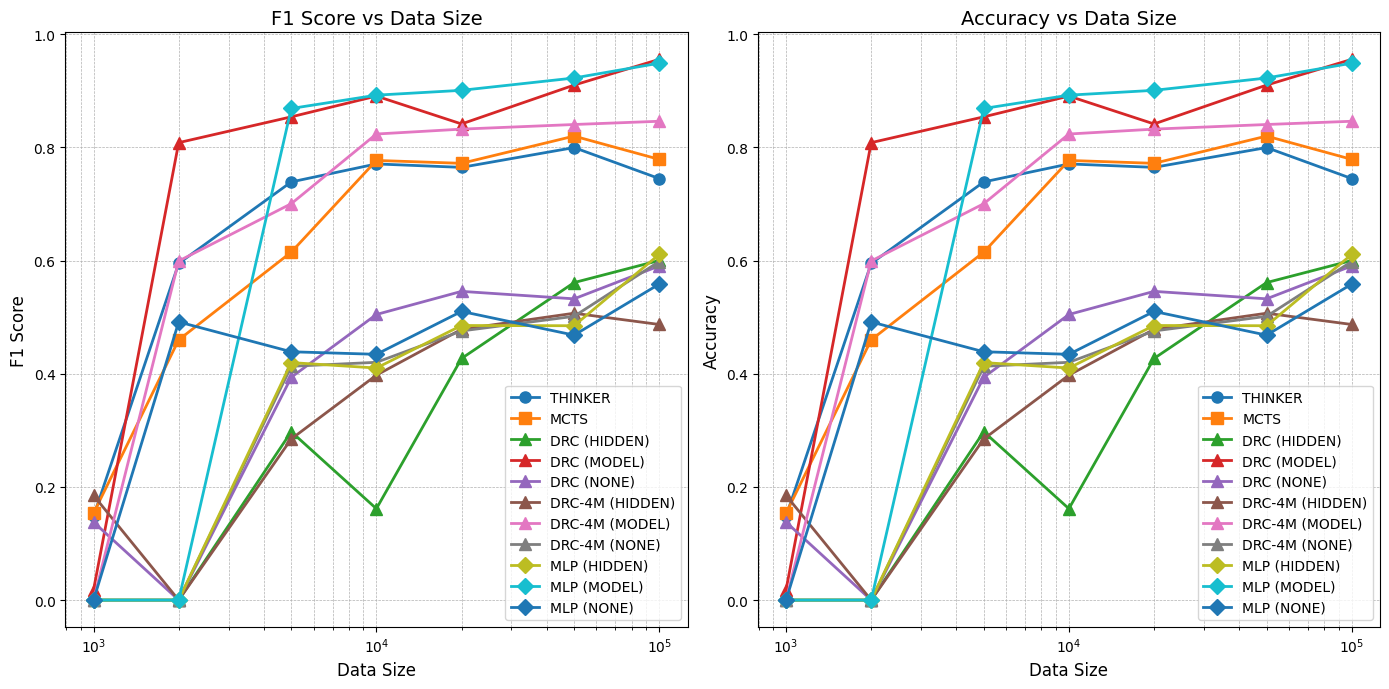

In [3]:
# Plotting
plt.figure(figsize=(14, 7))

# Accuracy plot
plt.subplot(1, 2, 2)
for i, dxpid in enumerate(dxpids):
    if "thinker" in dxpid:
        marker = 'o'
    elif "mcts" in dxpid:
        marker = 's'
    elif "drc" in dxpid:
        marker = '^'
    else:
        marker = 'D'
    plt.plot(data_sizes, f1_data[dxpid], label=f'{dxpid.upper()}', marker=marker, linestyle="-", linewidth=2, markersize=8)
plt.title('Accuracy vs Data Size', fontsize=14)
plt.xlabel('Data Size', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.xscale('log')

# F1 score plot
plt.subplot(1, 2, 1)
for i, dxpid in enumerate(dxpids):
    if "thinker" in dxpid:
        marker = 'o'
    elif "mcts" in dxpid:
        marker = 's'
    elif "drc" in dxpid:
        marker = '^'
    else:
        marker = 'D'
    plt.plot(data_sizes, f1_data[dxpid], label=f'{dxpid.upper()}', marker=marker, linestyle="-", linewidth=2, markersize=8)
plt.title('F1 Score vs Data Size', fontsize=14)
plt.xlabel('Data Size', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.xscale('log')

plt.show()